# Session 3: Inside the Model's Mind
## Visualizing Latent Space & Hyperparameters

**Objective:** Understand how the model stores information mathematically (Vectors) and how we control its creativity (Temperature).

**Prerequisites:**
1. `ollama serve` must be running.
2. `ollama pull llama3.2` must be completed.

In [1]:
import ollama
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Configuration
MODEL = "llama3.2:latest"

print(f"Using model: {MODEL}")

Using model: llama3.2:latest


### Part 1: Visualizing Latent Space (Embeddings)
We will ask the model to convert a list of words into "Embeddings" (Vectors). 
Then, we will use PCA (Principal Component Analysis) to flatten these multi-dimensional vectors into 2D points to see how the model "clusters" related concepts.

In [2]:
# A list of words mixing University concepts, Food, and Technology
words = [
    "Professor", "Student", "Dean", "Lecture", "Exam", "Grade", "Thesis", # Academic
    "Pizza", "Burger", "Pasta", "Salad", "Coffee", "Sandwich",          # Food
    "Python", "Computer", "Algorithm", "Keyboard", "Screen", "Code"     # Tech
]

embeddings = []

print("Fetching embeddings from Ollama...")
for word in words:
    # API Call to get the vector representation
    response = ollama.embeddings(model=MODEL, prompt=word)
    embeddings.append(response["embedding"])

embeddings = np.array(embeddings)
print(f"Done. Obtained {len(embeddings)} vectors of size {embeddings.shape[1]}.")

Fetching embeddings from Ollama...
Done. Obtained 19 vectors of size 3072.


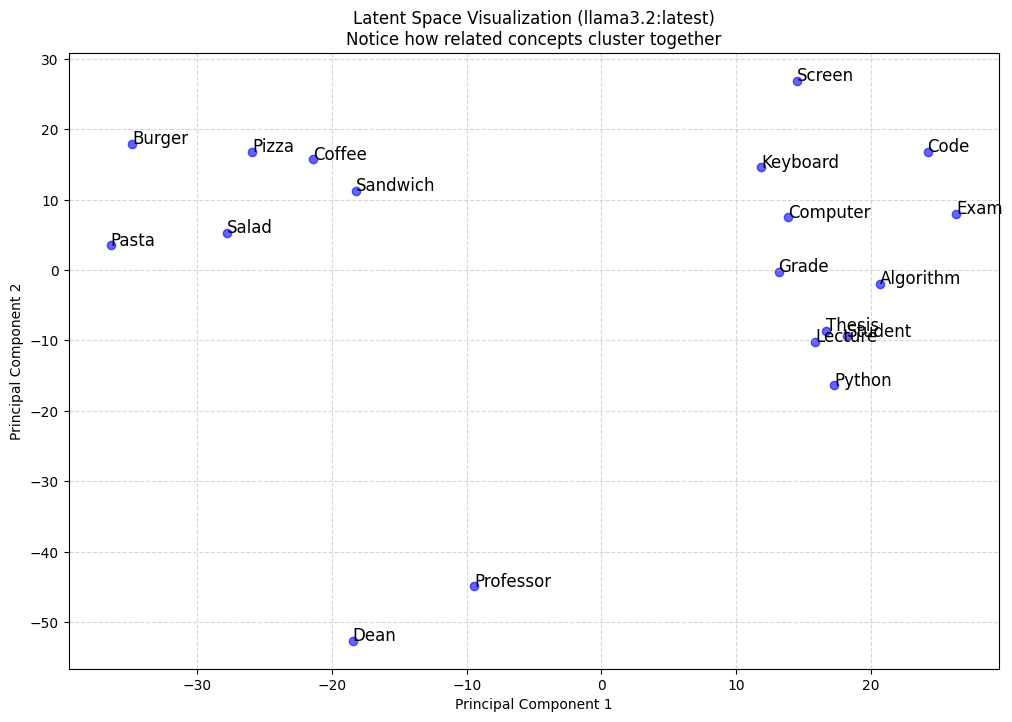

In [3]:
# Reduce dimensions from ~4096 to 2 using PCA for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', alpha=0.6)

# Add labels
for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=12)

plt.title(f"Latent Space Visualization ({MODEL})\nNotice how related concepts cluster together")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Observation:** You should see distinct clusters. "Pizza" and "Burger" will be close to each other, but far from "Thesis". This distance represents **Semantic Similarity**.

### Part 2: The Temperature Parameter
Visualizing how the `temperature` setting affects the randomness of the output.

* **T = 0.1:** Deterministic, boring, repetitive.
* **T = 0.9:** Creative, diverse, sometimes chaotic.

In [4]:
prompt = "Write a one-sentence slogan for a University AI Club."

print("--- Temperature 0.1 (Strict) ---")
for _ in range(3):
    res = ollama.generate(model=MODEL, prompt=prompt, options={'temperature': 0.1})
    print(f"> {res['response'].strip()}")

print("\n--- Temperature 0.9 (Creative) ---")
for _ in range(3):
    res = ollama.generate(model=MODEL, prompt=prompt, options={'temperature': 0.9})
    print(f"> {res['response'].strip()}")

--- Temperature 0.1 (Strict) ---
> "Empowering innovation, one algorithm at a time."
> "Empowering innovation, one algorithm at a time."
> "Empowering innovation, one algorithm at a time."

--- Temperature 0.9 (Creative) ---
> Here are a few options:

1. "Innovate, Learn, Repeat: Embracing the Future of Artificial Intelligence"
2. "Code, Create, Conquer: The University AI Club Where Ideas Come Alive"
3. "Unlocking Human Potential with AI: One Algorithm at a Time"
4. "Empowering Minds, Enhancing Tech: Join the University AI Club"
5. "Simulating Tomorrow, Today: The University AI Club's Mission"

Choose the one that resonates with you the most!
> "Empowering minds, redefining the future."
> Here are a few options:

1. "Innovating Intelligence, Empowering Minds"
2. "Where AI Meets Imagination"
3. "Unlocking Potential, One Algorithm at a Time"
4. "Harnessing the Power of Artificial Intelligence for a Brighter Future"
5. "Intelligent Minds, Infinite Possibilities"

Let me know if you'd like